# Загрузка данных

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [11]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zerocoder/python/pn14/netflix_users_data.csv')

In [14]:
df.head()

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Приведение столбцов к стилю camel_case

In [13]:
# Функция для преобразования в camelCase
def to_camel_case(name):
    # Разделяем по пробелам или другим разделителям (например, '_')
    parts = name.replace('_', ' ').split()  # Заменяем '_' на пробелы и делим по пробелам
    if len(parts) == 1:
        return parts[0].lower()  # Если одно слово, делаем его строчным
    return parts[0].lower() + ''.join(word.capitalize() for word in parts[1:])

# Применяем функцию к каждому названию столбца
new_columns = [to_camel_case(col) for col in df.columns]

# Создаем новый датафрейм с обновленными названиями столбцов
df.columns = new_columns

# Выводим результат
df.columns

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')

# Приведение типов данных

In [16]:
#привести дату к типу datetime
# Преобразуем столбцы joinDate и lastPaymentDate в datetime
df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y')
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], format='%d-%m-%y')

# Выводим типы данных для проверки
df.dtypes

,0
userId,int64
subscriptionType,object
monthlyRevenue,int64
joinDate,datetime64[ns]
lastPaymentDate,datetime64[ns]
country,object
age,int64
gender,object
device,object
planDuration,object


# Поиск дублей и пропусков в данных

In [18]:
# Поиск полных дубликатов
duplicates = df[df.duplicated()]
print("Полные дубликаты:")
print(duplicates)

# Проверка наличия пропущенных значений
missing_values = df.isnull().sum()
print("Количество пропущенных значений по столбцам:")
print(missing_values)

Полные дубликаты:
Empty DataFrame
Columns: [userId, subscriptionType, monthlyRevenue, joinDate, lastPaymentDate, country, age, gender, device, planDuration]
Index: []
Количество пропущенных значений по столбцам:
userId              0
subscriptionType    0
monthlyRevenue      0
joinDate            0
lastPaymentDate     0
country             0
age                 0
gender              0
device              0
planDuration        0
dtype: int64


# Исследовательский анализ данных

In [19]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month


In [20]:
# сколько уникальных пользователей?
# Подсчет количества уникальных пользователей
unique_users_count = df['userId'].nunique()
print(f"Количество уникальных пользователей: {unique_users_count}")

Количество уникальных пользователей: 2500


<ipython-input-41-549e4d1d4e8b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='viridis', order=labels)


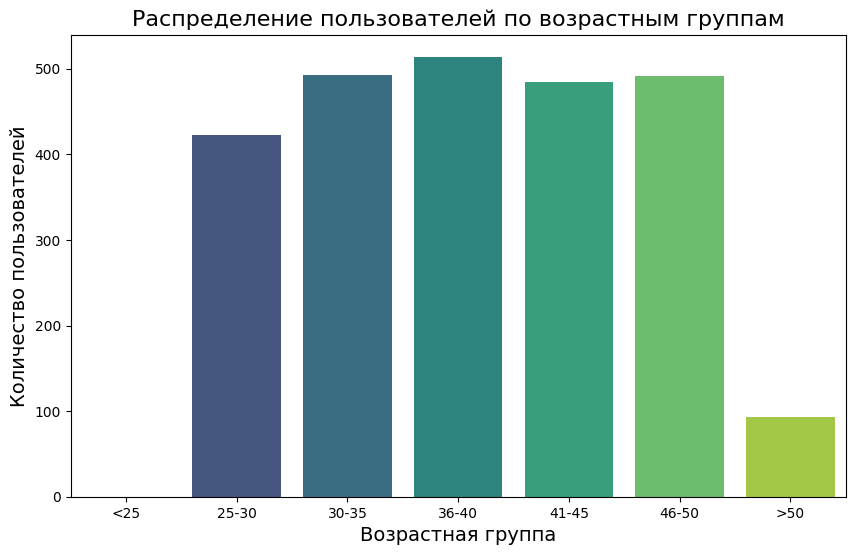

In [41]:
# изучить возраст пользователей (визуализировать)
import matplotlib.pyplot as plt
import seaborn as sns
# Создание возрастных групп
bins = [    0,    25,      30,    35,      40,      45,      50,  55]
labels = ['<25', '25-30', '30-35', '36-40', '41-45', '46-50', '>50']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Визуализация возрастных групп
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', palette='viridis', order=labels)
plt.title('Распределение пользователей по возрастным группам', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.show()

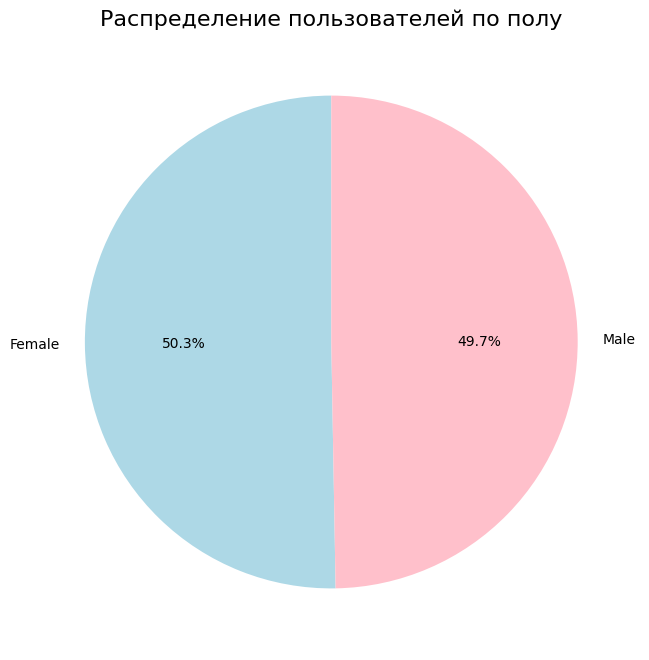

In [27]:
# изучить пол пользователей (визуализировать)
# Подсчет количества пользователей по полу
gender_counts = df['gender'].value_counts()
# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Распределение пользователей по полу', fontsize=16)
plt.show()

<ipython-input-29-17953a237b49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='device', palette='Set3', order=device_counts.index)


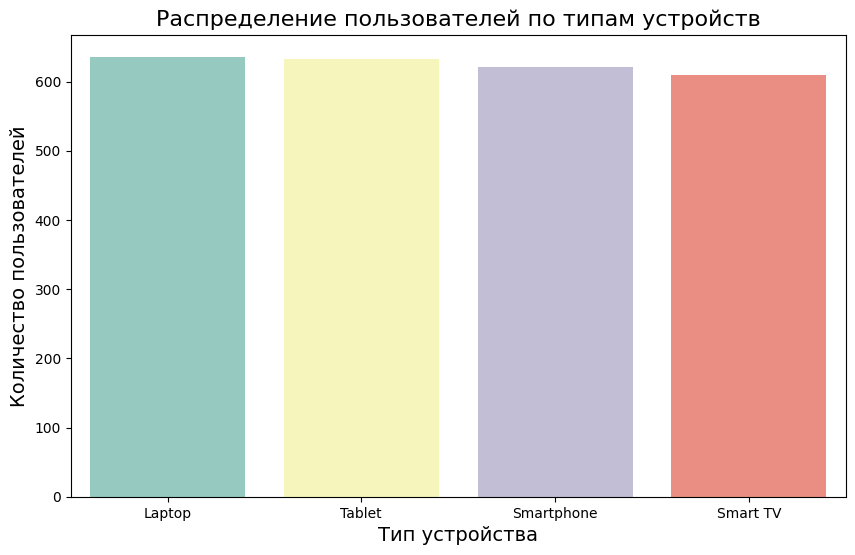

In [29]:
# изучить девайсы пользователей (визуализировать)
# Подсчет количества пользователей по типам устройств
device_counts = df['device'].value_counts()
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='device', palette='Set3', order=device_counts.index)
plt.title('Распределение пользователей по типам устройств', fontsize=16)
plt.xlabel('Тип устройства', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.show()

<ipython-input-31-11dcf51b231f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subscriptionType', palette='Set2', order=subscription_counts.index)


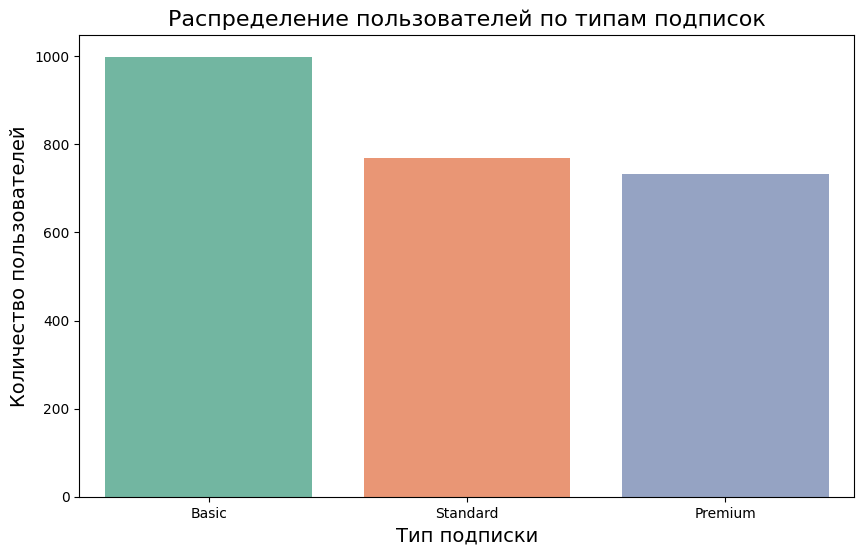

In [31]:
# изучить тип подписки пользователей (визуализировать)
# Подсчет количества пользователей по типам подписок
subscription_counts = df['subscriptionType'].value_counts()
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='subscriptionType', palette='Set2', order=subscription_counts.index)
plt.title('Распределение пользователей по типам подписок', fontsize=16)
plt.xlabel('Тип подписки', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.show()

<ipython-input-33-9bd1052f67d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='Set2')


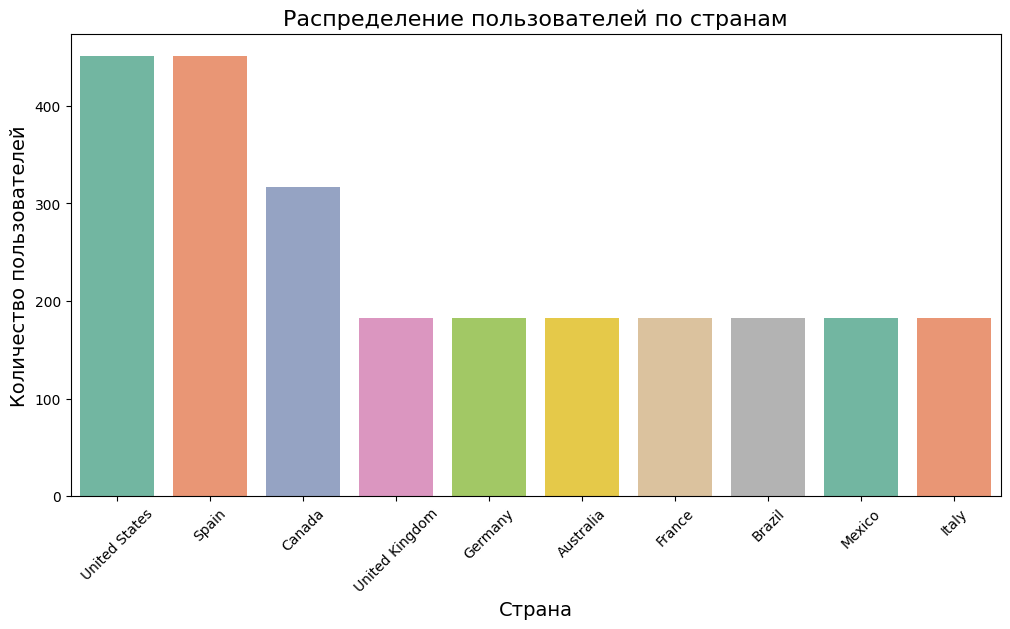

In [33]:
# изучить локацию пользователей (визуализировать)
# Подсчет количества пользователей по странам
country_counts = df['country'].value_counts()
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Set2')
plt.title('Распределение пользователей по странам', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(rotation=45)  # Поворот меток оси X для удобства чтения
plt.show()

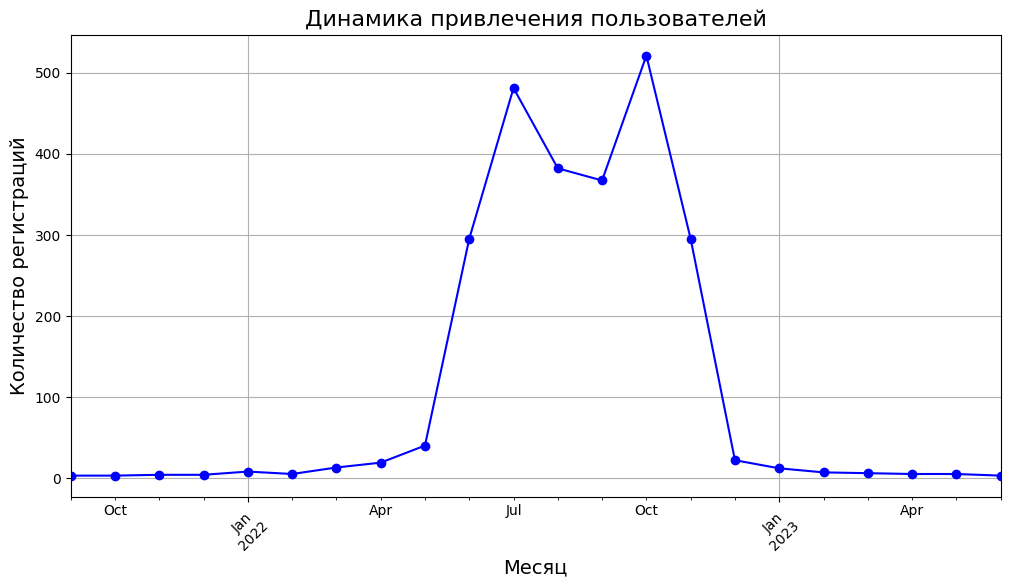

In [35]:
# изучть динамику привлечения пользователей (Join Date)
# Добавление столбцов с годом и месяцем
df['joinYear'] = df['joinDate'].dt.year
df['joinMonth'] = df['joinDate'].dt.to_period('M')  # Год-месяц в формате YYYY-MM

# Подсчет регистраций по месяцам
monthly_registrations = df.groupby('joinMonth').size()
# Построение линейного графика
plt.figure(figsize=(12, 6))
monthly_registrations.plot(kind='line', marker='o', color='blue')
plt.title('Динамика привлечения пользователей', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество регистраций', fontsize=14)
plt.xticks(rotation=45)  # Поворот меток оси X для удобства чтения
plt.grid(True)
plt.show()

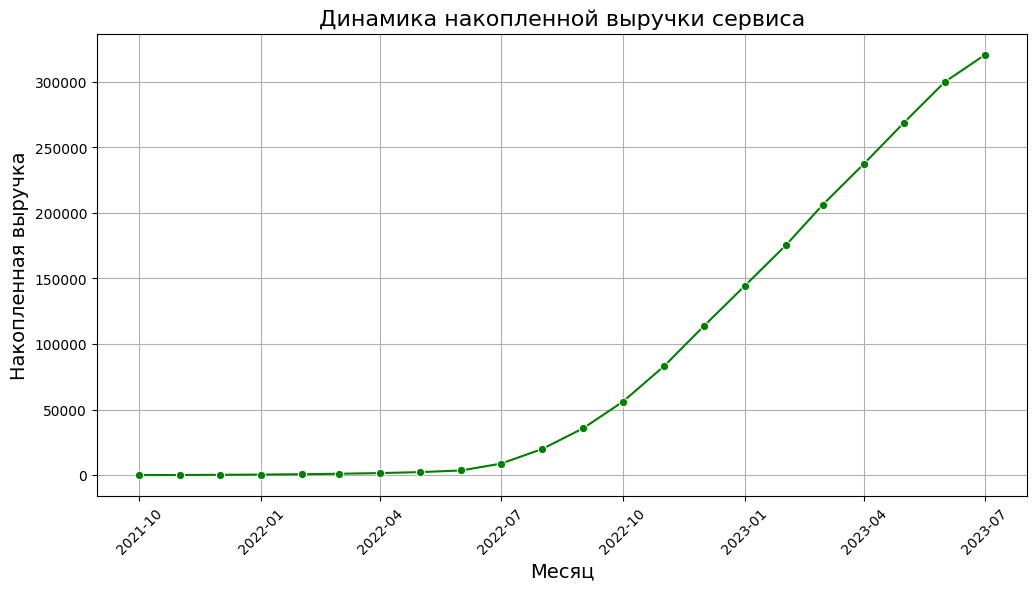

In [38]:
# изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)
# Создание временного ряда для каждого пользователя
all_dates = []

for _, row in df.iterrows():
    # Генерация списка дат от joinDate до lastPaymentDate
    date_range = pd.date_range(start=row['joinDate'], end=row['lastPaymentDate'], freq='MS')  # MS = начало месяца
    for date in date_range:
        all_dates.append({'month': date, 'revenue': row['monthlyRevenue']})

# Создание нового датафрейма
revenue_df = pd.DataFrame(all_dates)

# Группировка по месяцам и суммирование выручки
monthly_revenue = revenue_df.groupby('month')['revenue'].sum().reset_index()

# Расчет накопленной выручки
monthly_revenue['cumulative_revenue'] = monthly_revenue['revenue'].cumsum()

# Построение графика накопленной выручки
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month', y='cumulative_revenue', color='green', marker='o')
plt.title('Динамика накопленной выручки сервиса', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Накопленная выручка', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [43]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу
# Создание возрастных групп
bins = [    0,    25,      30,    35,      40,      45,      50,  55]
labels = ['<25', '25-30', '30-35', '36-40', '41-45', '46-50', '>50']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Группировка данных и расчет общей выручки
revenue_by_age_group = df.groupby('age_group')['monthlyRevenue'].sum().reset_index()

# Поиск самой платежеспособной группы
most_profitable_group = revenue_by_age_group.loc[revenue_by_age_group['monthlyRevenue'].idxmax()]

print("Выручка по возрастным группам:")
print(revenue_by_age_group)
print("\nСамая платежеспособная группа:")
print(most_profitable_group)

Выручка по возрастным группам:
  age_group  monthlyRevenue
0       <25               0
1     25-30            5346
2     30-35            6146
3     36-40            6397
4     41-45            6112
5     46-50            6133
6       >50            1137

Самая платежеспособная группа:
age_group         36-40
monthlyRevenue     6397
Name: 3, dtype: object


<ipython-input-43-c20217713dba>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('age_group')['monthlyRevenue'].sum().reset_index()


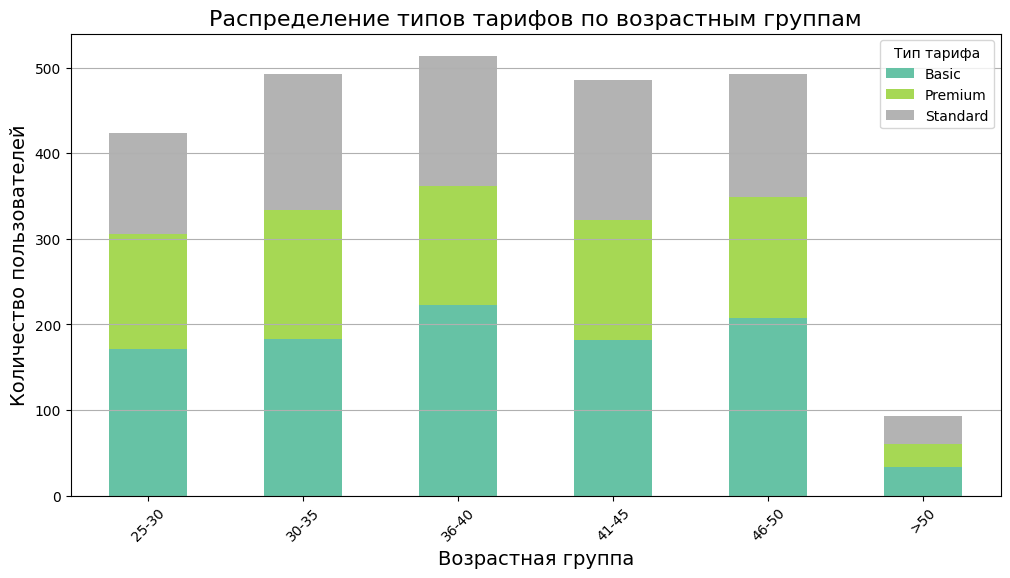

In [47]:
# посмотреть зависимость типа тарифа от группы возраста пользователя
# Создание кросс-таблицы
cross_table = pd.crosstab(df['age_group'], df['subscriptionType'])

# Построение столбчатой диаграммы
cross_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Распределение типов тарифов по возрастным группам', fontsize=16)
plt.xlabel('Возрастная группа', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Тип тарифа')
plt.grid(axis='y')
plt.show()

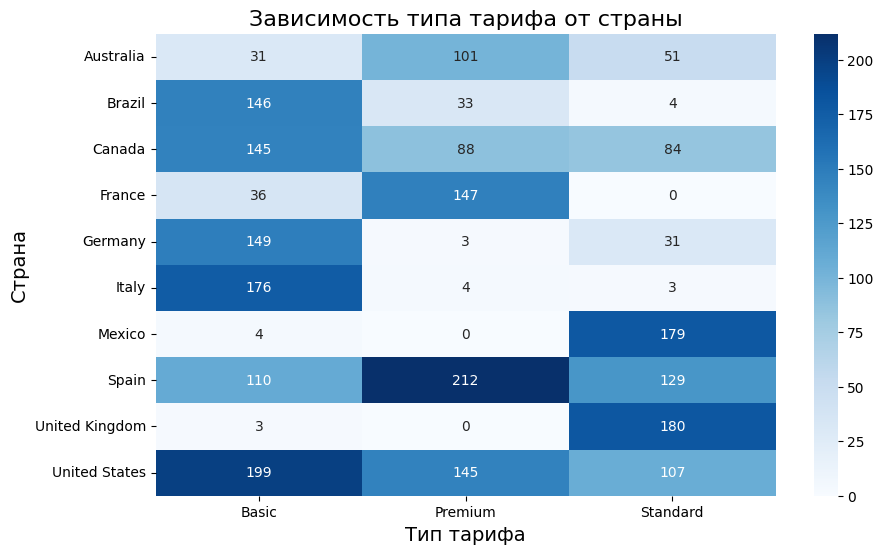

In [49]:
# посмотреть зависимость типа тарифа от страны пользователя
# Создание кросс-таблицы
cross_table = pd.crosstab(df['country'], df['subscriptionType'])

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, annot=True, fmt='d', cmap='Blues')
plt.title('Зависимость типа тарифа от страны', fontsize=16)
plt.xlabel('Тип тарифа', fontsize=14)
plt.ylabel('Страна', fontsize=14)
plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1. Количество уникальных пользователей: 2500
2. Возраст пользователей: от 25 до 55 лет
3. Распределение пользователей по возрасту равномерное
4. Распределение пользователей по типам устройств равномерное
5. Наиболее популярна у пользователей подписка Basic
6. В основном пользователи из трёх стран: США, Испания, Канада
7. Основное привлечение пользователей было с июня по ноябрь 2022 года
8. Динамика накопленной выручки начала резко увеличиваться с июля 2022 года
9.  Самая платежеспособная группа 36-40 лет
10. Распределение типов тарифов по возрастным группам равномерное
11. Тариф Premium наиболее популярен в Испании, США и Франции. Тариф Standart в Великобритании, Мексике. Тариф Basic в США и Италии